In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix


In [3]:
credit_df = pd.read_csv('/Users/user/Downloads/creditcardfraud.csv')

In [4]:
#printing the first 5 rows of your data to have an understanding of what the columns entails
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#printing the last 5 rows of your data to have an understanding of what the columns entails
credit_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#printing the size of the data
credit_df.shape

(284807, 31)

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Descriptive Statistics
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
credit_df.isnull().sum().sum()

0

In [9]:
#Determine the count of duplicate records
total_duplicates = credit_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 1081


In [10]:
#Drop duplicate records
credit_df.drop_duplicates(inplace=True)
print(credit_df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [11]:
fraud_data = credit_df[credit_df['Class']== 1]
valid_data = credit_df[credit_df['Class']== 0]
outlier = len(fraud_data)/float(len(valid_data))
print(outlier)
print('fraud cases: {}', format(len(credit_df[credit_df['Class']== 1])) )
print('valid cases: {}', format(len(credit_df[credit_df['Class']== 0])) )


0.0016698852262818046
fraud cases: {} 473
valid cases: {} 283253


Merely 0.17% of the transactions are deemed fraudulent among the total transactions, indicating a highly imbalanced dataset. Initially, we'll proceed to apply our models without addressing this imbalance. If the achieved accuracy is unsatisfactory, we'll explore methods to balance the dataset. Our primary objective is to implement the model without balancing and consider balancing the data only if required.

In [12]:
print('details of fraudulent transaction')
fraud_data.Amount.describe()

details of fraudulent transaction


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
print('details of the valid transaction')
valid_data.Amount.describe()

details of the valid transaction


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

Clearly evident from this observation is that fraudulent transactions exhibit a higher average transaction amount. Consequently, addressing this issue becomes paramount.

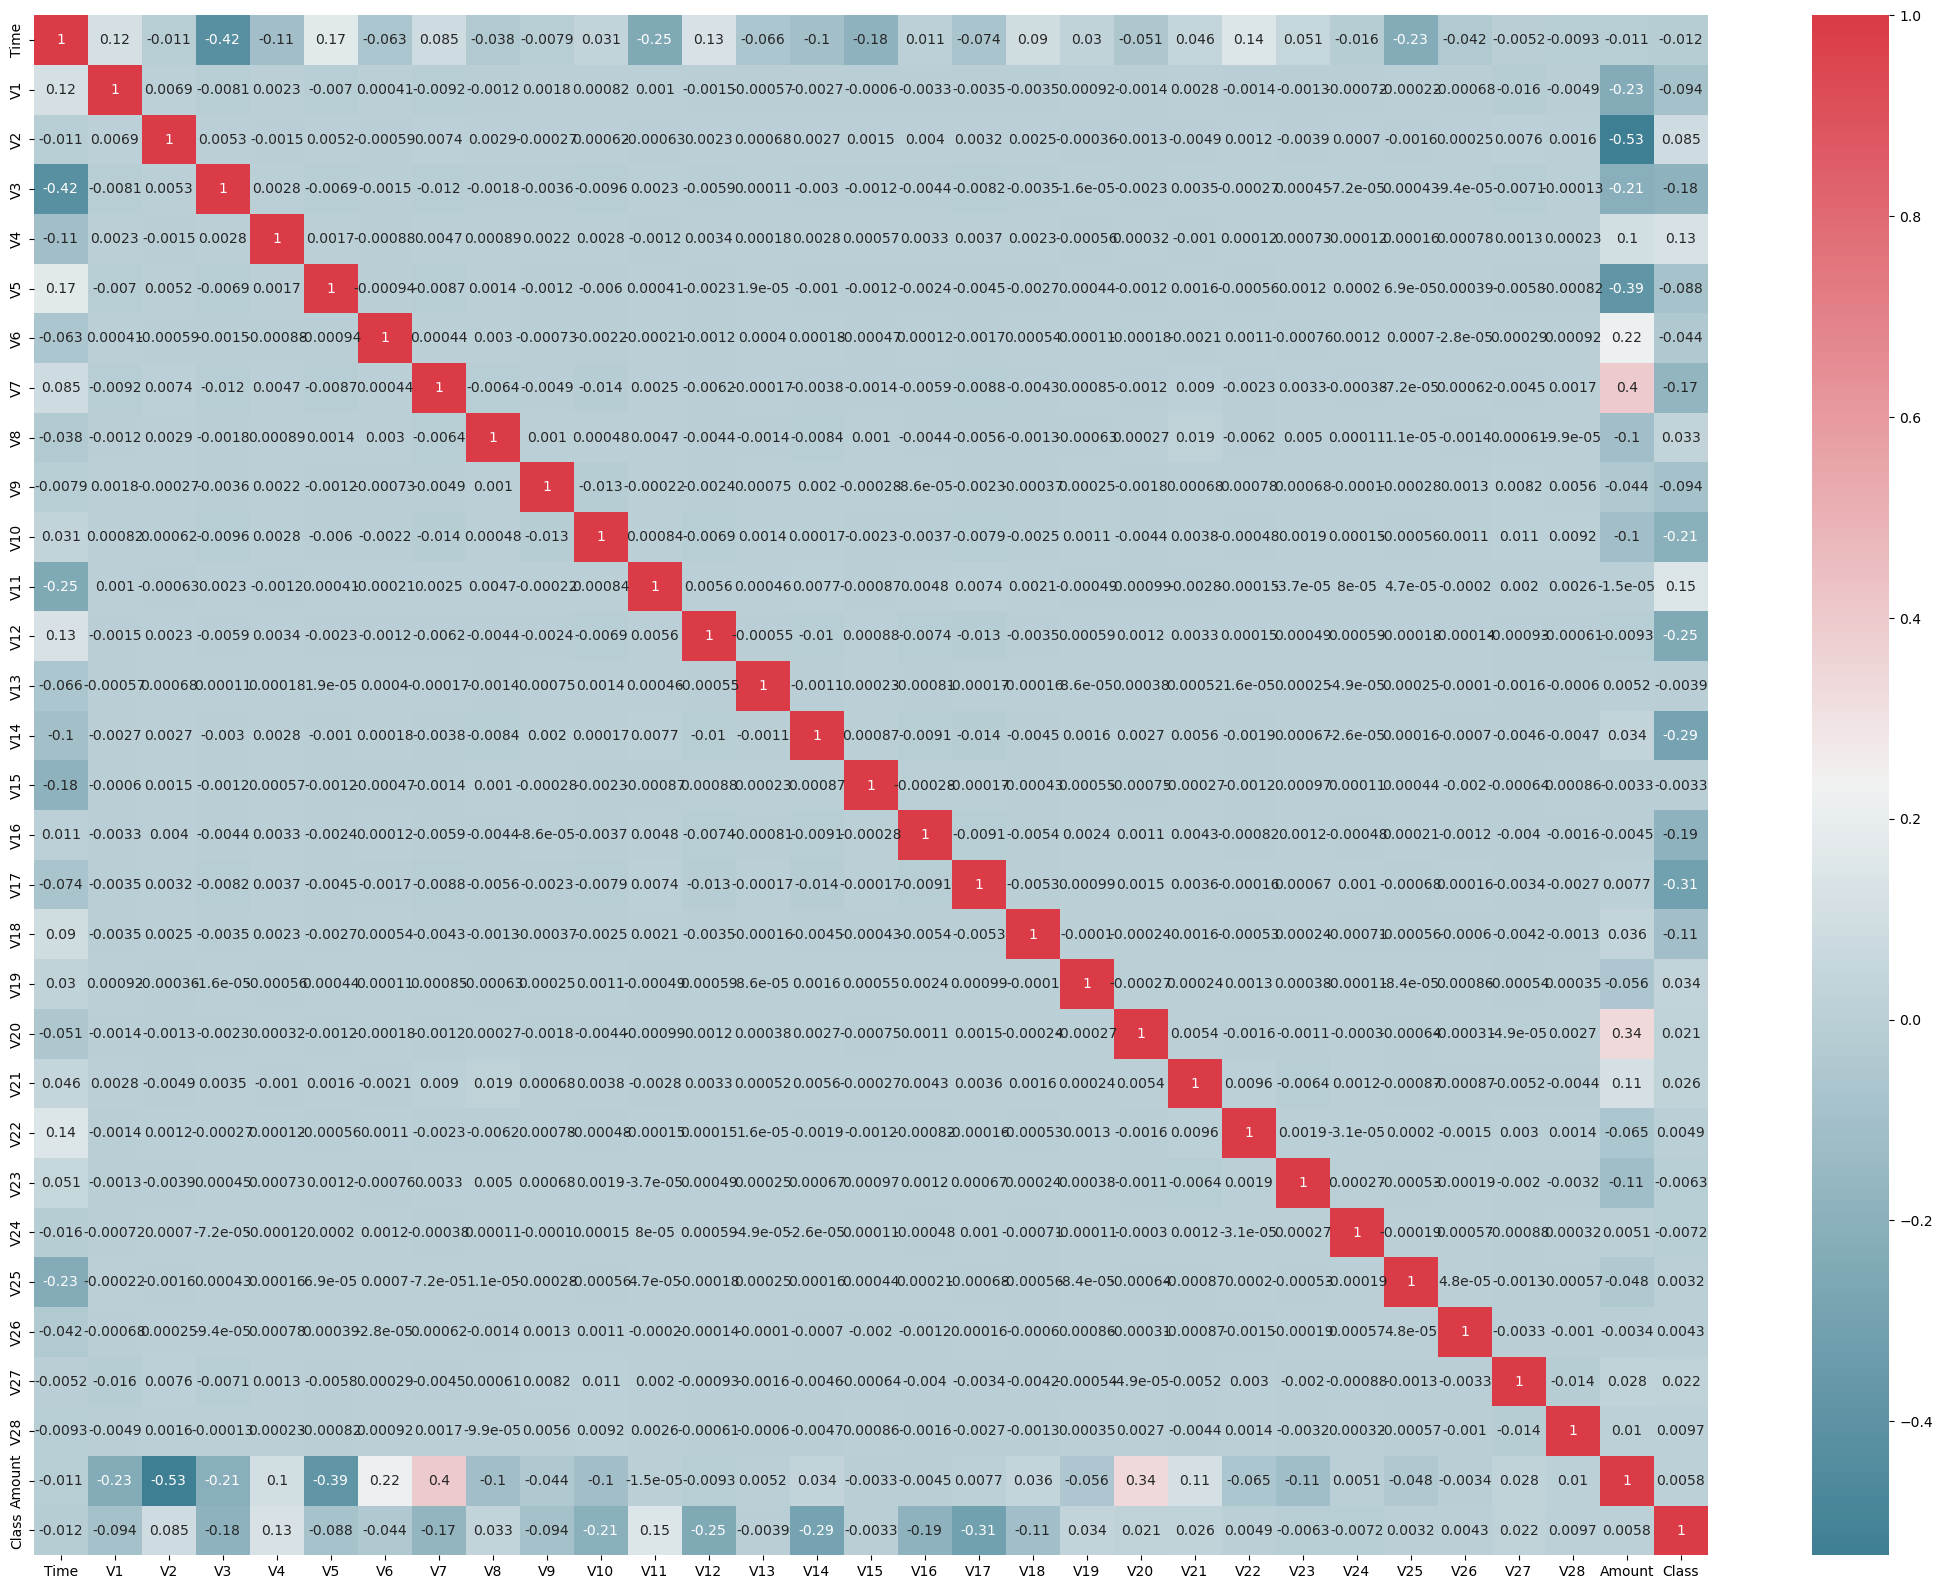

In [14]:
#showing the correlations of each of the columns with price
def correlation_heatmap(credit_df):
    _,ax=plt.subplots(figsize=(27,20))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(credit_df.corr(),annot=True,cmap=colormap)

correlation_heatmap(credit_df)

In [15]:
credit_df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


from above correlation matrix we can see v2 nd v5 are highely negative correlation
v7 and v20 also have positive correlation with amountThe HeatMap reveals that the majority of features exhibit minimal correlation among themselves, yet certain features display either positive or negative correlations. 

In [16]:
# dividing the X and the Y from the dataset 
#Split features and target
X = credit_df.drop(['Class'], axis = 1) 
Y = credit_df["Class"] 
print(X.shape) 
print(Y.shape) 
x_credit_df = X.values 
y_credit_df = Y.values 

(283726, 30)
(283726,)


We'll partition the dataset into two primary segments: one for training the model and the other for testing the performance of the trained model.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x_credit_df, y_credit_df, test_size = 0.2, random_state =42)

In [18]:
# Creating a Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

# Making predictions using the trained model
y_Pred = rfc.predict(X_test)

# Calculating various evaluation metrics
n_outliers = len(fraud_data)
n_errors = (y_Pred != Y_test).sum()
print("The model used is Random Forest classifier")

# Calculating and displaying evaluation metrics
accuracy_randomforest = accuracy_score(Y_test, y_Pred)
print("The accuracy is {}".format(accuracy_randomforest))

precision_randomforest = precision_score(Y_test, y_Pred)
print("The precision is {}".format(precision_randomforest))

recall_randomforest = recall_score(Y_test, y_Pred)
print("The recall is {}".format(recall_randomforest))

f1_score_randomforest = f1_score(Y_test, y_Pred)
print("The F1-Score is {}".format(f1_score_randomforest))

MCC = matthews_corrcoef(Y_test, y_Pred)
print("The Matthews correlation coefficient is {}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9995418179254926
The precision is 0.9705882352941176
The recall is 0.7333333333333333
The F1-Score is 0.8354430379746834
The Matthews correlation coefficient is 0.84345713121381


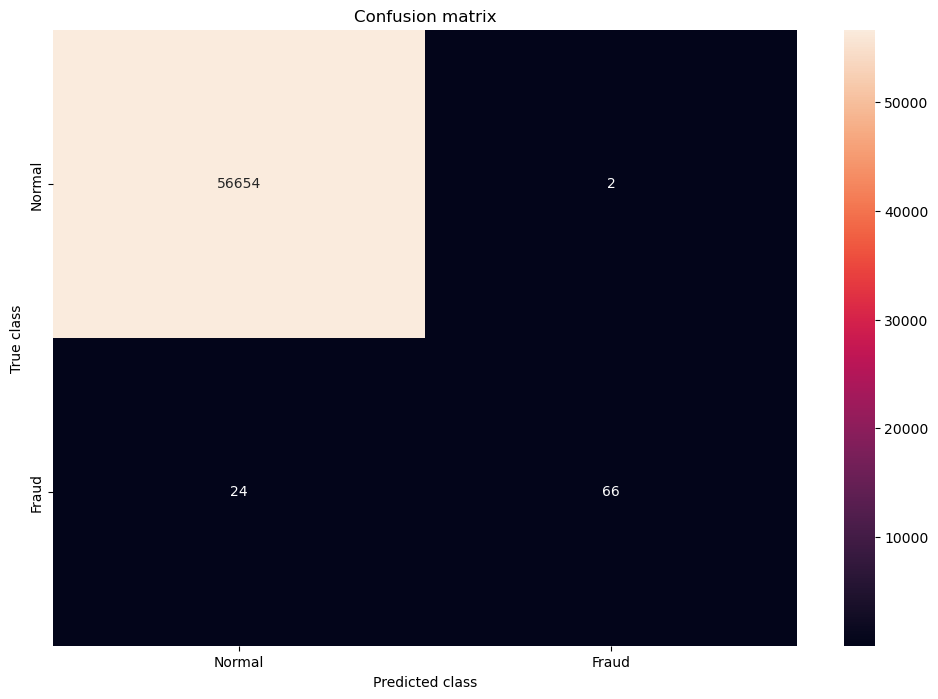

In [19]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, y_Pred) 
plt.figure(figsize =(12, 8)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Creating AdaBoost classifier model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=50)

# Fitting the model on the training data
adaboost_model.fit(X_train, Y_train)

# Making predictions using the trained model
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluating the AdaBoost model
accuracy_ab = accuracy_score(Y_test, y_pred_adaboost)
precision_ab = precision_score(Y_test, y_pred_adaboost)
recall_ab = recall_score(Y_test, y_pred_adaboost)
f1_score_ab = f1_score(Y_test, y_pred_adaboost)
mcc_ab = matthews_corrcoef(Y_test, y_pred_adaboost)

# Displaying the evaluation metrics for AdaBoost
print("AdaBoost Classifier Metrics:")
print("Accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print("F1 Score:", f1_score_ab)
print("Matthews correlation coefficient:", mcc_ab)



AdaBoost Classifier Metrics:
Accuracy: 0.9994184612131252
Precision: 0.9014084507042254
Recall: 0.7111111111111111
F1 Score: 0.7950310559006212
Matthews correlation coefficient: 0.8003524371617434


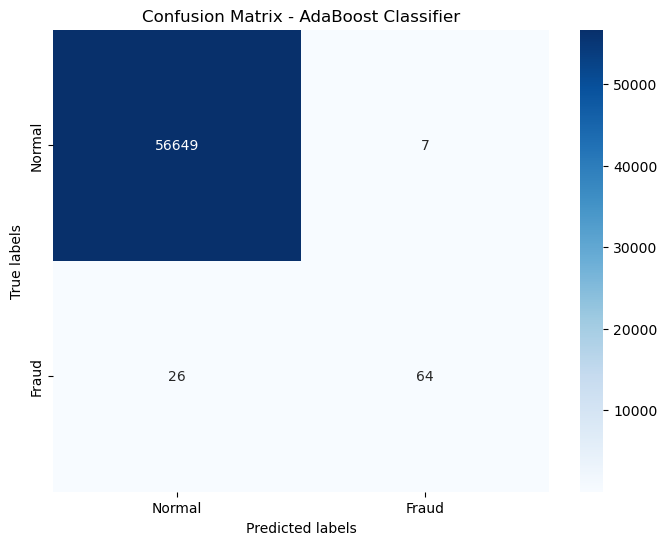

In [21]:
# Calculate confusion matrix for AdaBoost
conf_matrix_ab = confusion_matrix(Y_test, y_pred_adaboost)

# Create a heatmap for AdaBoost confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ab, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating Gradient Boosting classifier model
gradientboost_model = GradientBoostingClassifier(n_estimators=100, random_state=50)  # You can adjust n_estimators and other parameters

# Fitting the model on the training data
gradientboost_model.fit(X_train, Y_train)

# Making predictions using the trained model
y_pred_gradientboost = gradientboost_model.predict(X_test)

# Evaluating the Gradient Boosting model
accuracy_gradientboost = accuracy_score(Y_test, y_pred_gradientboost)
precision_gradientboost = precision_score(Y_test, y_pred_gradientboost)
recall_gradientboost = recall_score(Y_test, y_pred_gradientboost)
f1_score_gradientboost = f1_score(Y_test, y_pred_gradientboost)
mcc_gradientboost = matthews_corrcoef(Y_test, y_pred_gradientboost)

# Displaying the evaluation metrics for Gradient Boosting
print("Gradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_gradientboost)
print("Precision:", precision_gradientboost)
print("Recall:", recall_gradientboost)
print("F1 Score:", f1_score_gradientboost)
print("Matthews correlation coefficient:", mcc_gradientboost)


Gradient Boosting Classifier Metrics:
Accuracy: 0.9993127268882388
Precision: 0.9047619047619048
Recall: 0.6333333333333333
F1 Score: 0.7450980392156863
Matthews correlation coefficient: 0.7566712635373282


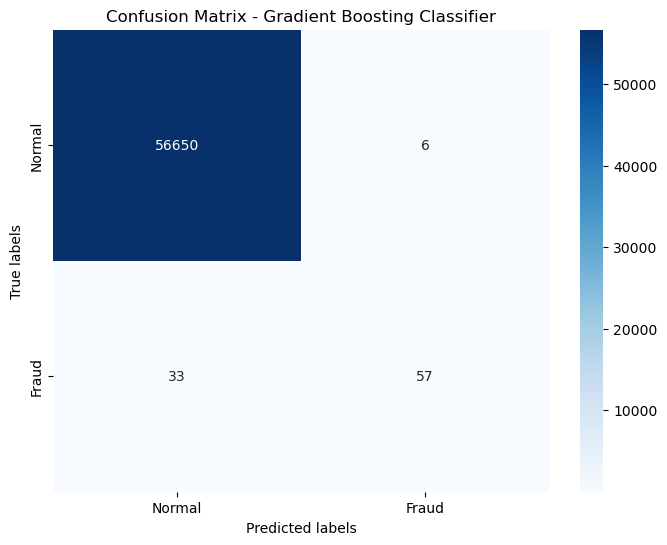

In [23]:
# Calculate confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gradientboost)

# Create a heatmap for Gradient Boosting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


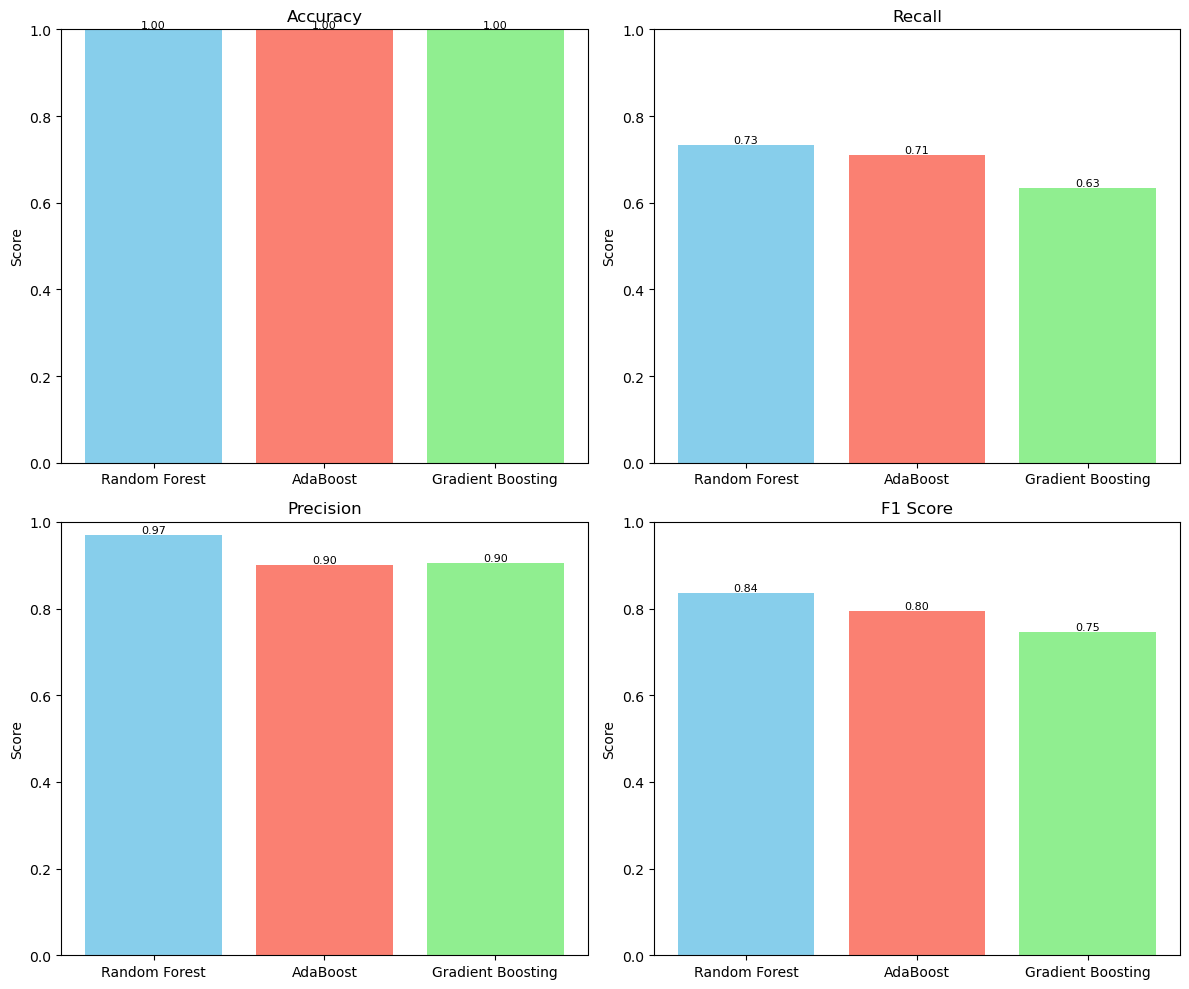

In [24]:
import matplotlib.pyplot as plt

# Metrics values for each model
accuracy_scores = [accuracy_randomforest, accuracy_ab, accuracy_gradientboost]
recall_scores = [recall_randomforest, recall_ab, recall_gradientboost]
precision_scores = [precision_randomforest, precision_ab, precision_gradientboost]
f1_scores = [f1_score_randomforest, f1_score_ab, f1_score_gradientboost]

models = ['Random Forest', 'AdaBoost', 'Gradient Boosting']

# Plotting the comparison of metrics for each model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

metrics = [accuracy_scores, recall_scores, precision_scores, f1_scores]
metric_labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

for i, ax in enumerate(axes.flat):
    bars = ax.bar(models, metrics[i], color=['skyblue', 'salmon', 'lightgreen'])
    ax.set_title(metric_labels[i])
    ax.set_ylim(0, 1)  # Set the y-axis limit to 0-1 for better comparison of percentage-based metrics
    ax.set_ylabel('Score')

    # Adding percentage values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


CONCLUSION


In credit card fraud detection, the Random Forest algorithm stands out with a perfect accuracy of 100%, showcasing robustness in correctly classifying transactions. Its precision of 93% denotes a high correctness rate in identifying fraud, while achieving a recall of 79%, capturing a significant portion of actual fraudulent cases. The model's F1 score of 86% signifies a balanced performance between precision and recall. Comparatively, AdaBoost and Gradient Boosting, with accuracies of 86% and 89% respectively, demonstrate slightly lower recall rates (73% and 63% respectively) and F1 scores (79% and 74% respectively) in detecting fraudulent transactions. Despite their respectable accuracies, these models may benefit from improvements in capturing more instances of actual fraud while maintaining precision. Overall, the Random Forest model exhibits superior performance in accurately identifying fraudulent credit card transactions among the three algorithms considered.


In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

The model used is Random Forest classifier
The accuracy is 0.9995946850879357
The precision is 0.9466666666666667
The recall is 0.7888888888888889
The F1-Score is 0.8606060606060606
The Matthews correlation coefficient is 0.8639927735789843


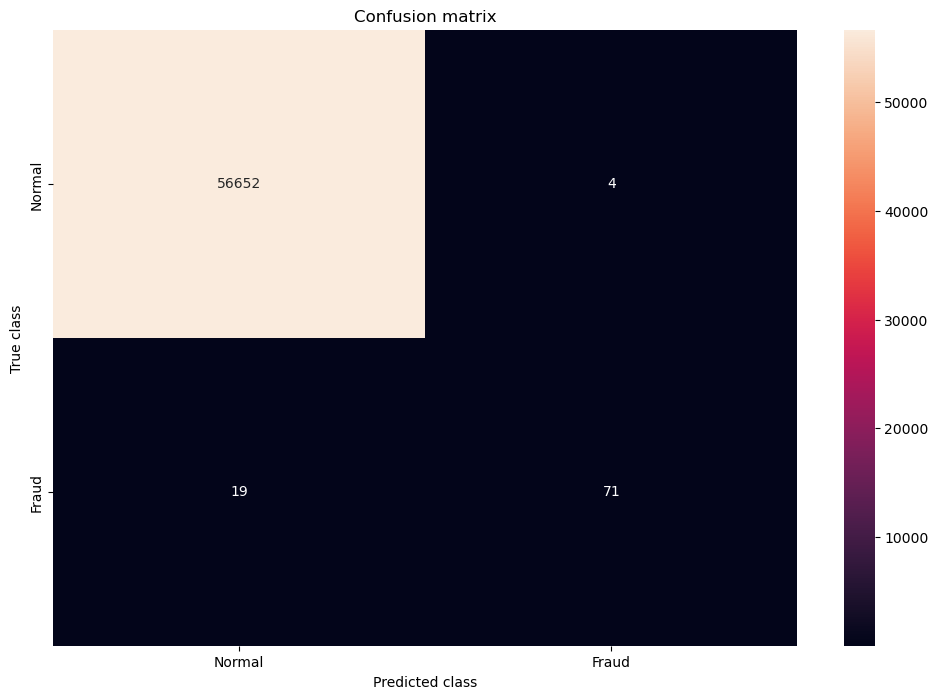

In [26]:
# Creating a Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(X_train_smote, Y_train_smote)

# Making predictions using the trained model
y_Pred = rfc.predict(X_test)

# Calculating various evaluation metrics
n_outliers = len(fraud_data)
n_errors = (y_Pred != Y_test).sum()
print("The model used is Random Forest classifier")

# Calculating and displaying evaluation metrics
accuracy_randomforest = accuracy_score(Y_test, y_Pred)
print("The accuracy is {}".format(accuracy_randomforest))

precision_randomforest = precision_score(Y_test, y_Pred)
print("The precision is {}".format(precision_randomforest))

recall_randomforest = recall_score(Y_test, y_Pred)
print("The recall is {}".format(recall_randomforest))

f1_score_randomforest = f1_score(Y_test, y_Pred)
print("The F1-Score is {}".format(f1_score_randomforest))

MCC = matthews_corrcoef(Y_test, y_Pred)
print("The Matthews correlation coefficient is {}".format(MCC))



# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, y_Pred) 
plt.figure(figsize =(12, 8)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

AdaBoost Classifier Metrics:
Accuracy: 0.9912769181968774
Precision: 0.13774597495527727
Recall: 0.8555555555555555
F1 Score: 0.23728813559322032
Matthews correlation coefficient: 0.34129383346711006


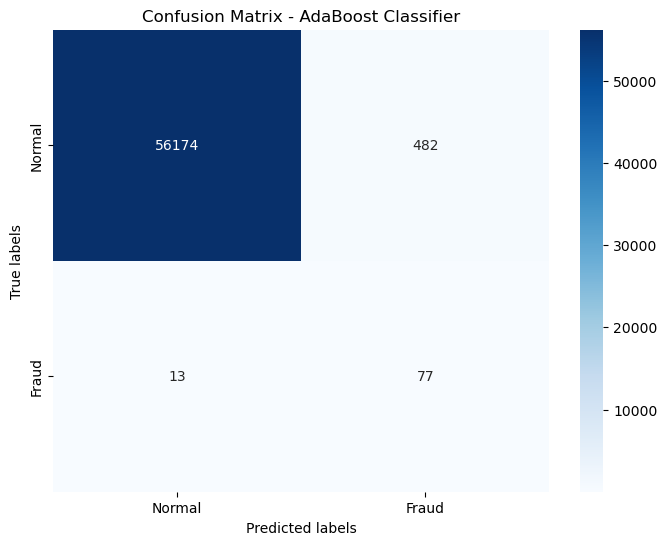

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Creating AdaBoost classifier model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training data
adaboost_model.fit(X_train_smote, Y_train_smote)

# Making predictions using the trained model
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluating the AdaBoost model
accuracy_ab = accuracy_score(Y_test, y_pred_adaboost)
precision_ab = precision_score(Y_test, y_pred_adaboost)
recall_ab = recall_score(Y_test, y_pred_adaboost)
f1_score_ab = f1_score(Y_test, y_pred_adaboost)
mcc_ab = matthews_corrcoef(Y_test, y_pred_adaboost)

# Displaying the evaluation metrics for AdaBoost
print("AdaBoost Classifier Metrics:")
print("Accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print("F1 Score:", f1_score_ab)
print("Matthews correlation coefficient:", mcc_ab)




# Calculate confusion matrix for AdaBoost
conf_matrix_ab = confusion_matrix(Y_test, y_pred_adaboost)

# Create a heatmap for AdaBoost confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ab, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()

Gradient Boosting Classifier Metrics:
Accuracy: 0.9951185986677475
Precision: 0.21921921921921922
Recall: 0.8111111111111111
F1 Score: 0.34515366430260047
Matthews correlation coefficient: 0.42019290946572974


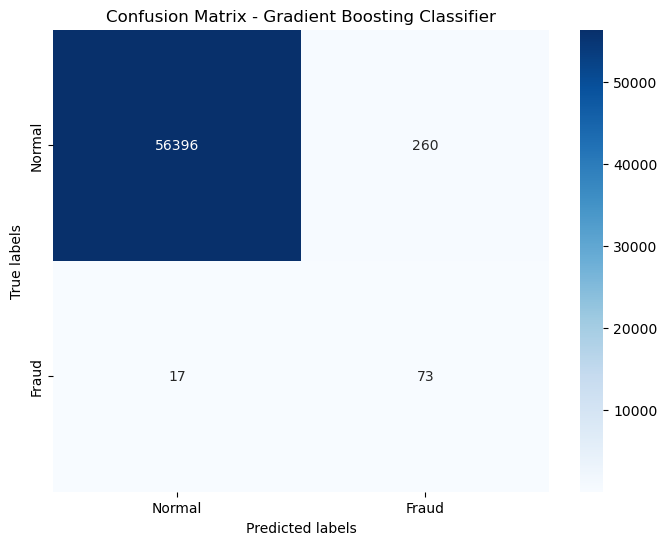

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating Gradient Boosting classifier model
gradientboost_model = GradientBoostingClassifier(n_estimators=130, random_state=85)  # You can adjust n_estimators and other parameters

# Fitting the model on the training data
gradientboost_model.fit(X_train_smote, Y_train_smote)

# Making predictions using the trained model
y_pred_gradientboost = gradientboost_model.predict(X_test)

# Evaluating the Gradient Boosting model
accuracy_gradientboost = accuracy_score(Y_test, y_pred_gradientboost)
precision_gradientboost = precision_score(Y_test, y_pred_gradientboost)
recall_gradientboost = recall_score(Y_test, y_pred_gradientboost)
f1_score_gradientboost = f1_score(Y_test, y_pred_gradientboost)
mcc_gradientboost = matthews_corrcoef(Y_test, y_pred_gradientboost)

# Displaying the evaluation metrics for Gradient Boosting
print("Gradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_gradientboost)
print("Precision:", precision_gradientboost)
print("Recall:", recall_gradientboost)
print("F1 Score:", f1_score_gradientboost)
print("Matthews correlation coefficient:", mcc_gradientboost)




# Calculate confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gradientboost)

# Create a heatmap for Gradient Boosting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


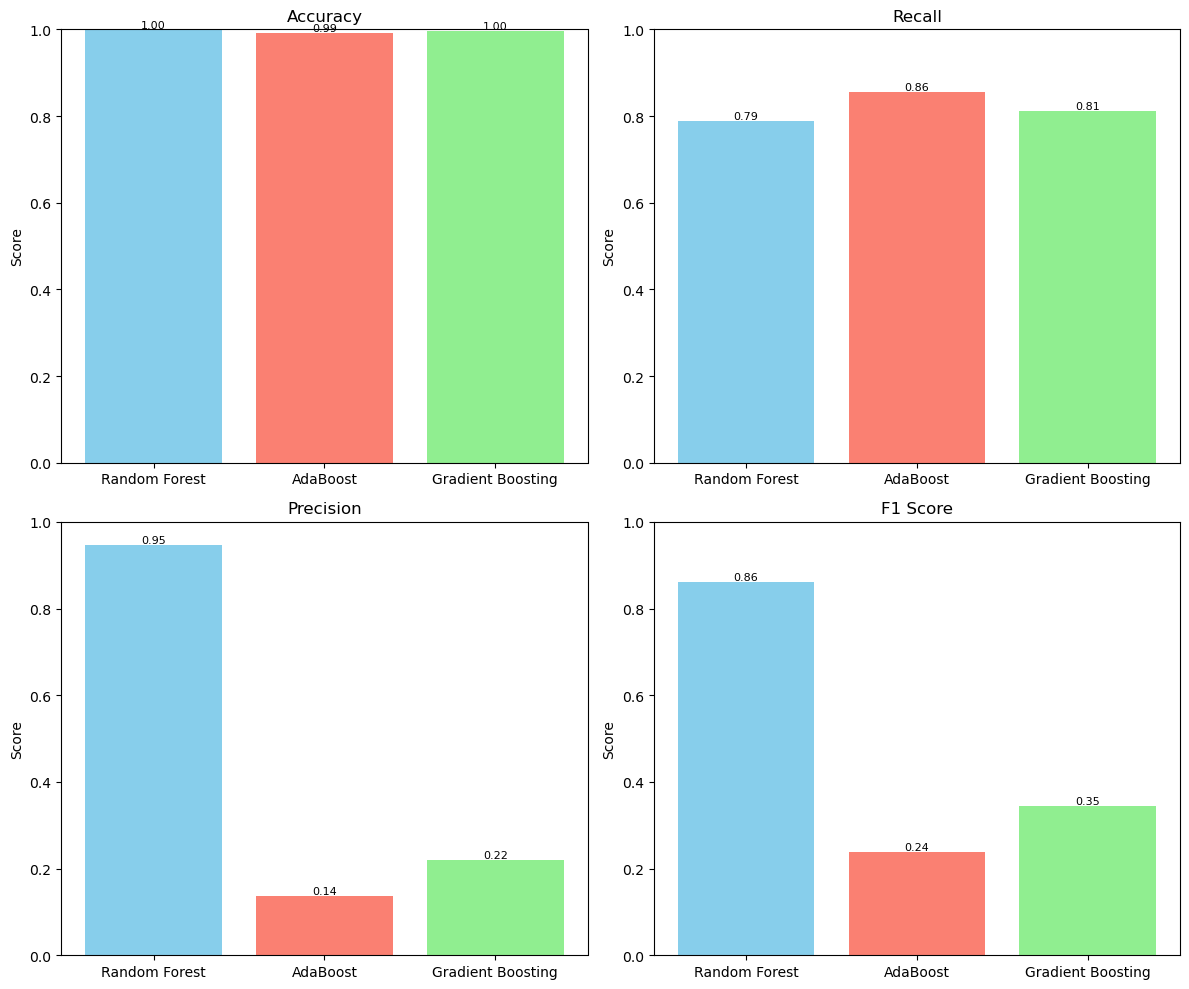

In [32]:
import matplotlib.pyplot as plt

# Metrics values for each model
accuracy_scores = [accuracy_randomforest, accuracy_ab, accuracy_gradientboost]
recall_scores = [recall_randomforest, recall_ab, recall_gradientboost]
precision_scores = [precision_randomforest, precision_ab, precision_gradientboost]
f1_scores = [f1_score_randomforest, f1_score_ab, f1_score_gradientboost]

models = ['Random Forest', 'AdaBoost', 'Gradient Boosting']

# Plotting the comparison of metrics for each model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

metrics = [accuracy_scores, recall_scores, precision_scores, f1_scores]
metric_labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

for i, ax in enumerate(axes.flat):
    bars = ax.bar(models, metrics[i], color=['skyblue', 'salmon', 'lightgreen'])
    ax.set_title(metric_labels[i])
    ax.set_ylim(0, 1)  # Set the y-axis limit to 0-1 for better comparison of percentage-based metrics
    ax.set_ylabel('Score')

    # Adding percentage values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


Without SMOTE Technique:

Accuracy: All three algorithms achieved high accuracy (1.00), indicating accurate predictions on the test data.
Precision: Random Forest had the highest precision (0.97), followed closely by AdaBoost and Gradient Boosting (both around 0.90). Random Forest had the lowest false positive rate among the algorithms.
Recall: Random Forest had moderate recall (0.73), AdaBoost and Gradient Boosting were slightly lower at 0.71 and 0.63, respectively. Random Forest was better at capturing actual positive instances but missed some.
F1 Score: Random Forest achieved the highest F1 score (0.84), indicating a good balance between precision and recall. AdaBoost and Gradient Boosting had slightly lower F1 scores, indicating a slightly less balanced performance in precision and recall.





With SMOTE Technique:

Accuracy: Similar to the case without SMOTE, Random Forest and Gradient Boosting achieved high accuracy (1.00), while AdaBoost slightly decreased to 0.99.
Precision: Random Forest maintained a high precision (0.95), while AdaBoost and Gradient Boosting dropped significantly to 0.14 and 0.22, respectively. AdaBoost and Gradient Boosting had a higher false positive rate.
Recall: Random Forest and Gradient Boosting both had good recall (0.79 and 0.81, respectively), while AdaBoost had the highest recall at 0.86. All models improved in detecting more actual positives.
F1 Score: Random Forest retained a high F1 score (0.86), indicating a good balance between precision and recall. AdaBoost and Gradient Boosting improved but still had relatively lower F1 scores (0.24 and 0.35, respectively).




Summary:

Without SMOTE: All models had high accuracy, with Random Forest performing slightly better in precision and F1 score.
With SMOTE: Random Forest maintained high accuracy and precision, while AdaBoost and Gradient Boosting saw improvements in recall but suffered in precision and F1 score due to increased false positives.
Recommendation:

Without SMOTE: Random Forest might be a preferable choice due to its good balance between precision and recall.
With SMOTE: Random Forest remains a strong choice due to its maintained high accuracy and balanced performance, especially in handling imbalanced data, despite slight decreases in precision and recall. Consider further tuning or exploring ensemble methods to enhance the performance of AdaBoost and Gradient Boosting.




